# Yahoo Finance Python API Demo

## Import

Docs can be found at https://pypi.org/project/yfinance/

In [14]:
import yfinance as yf
import requests

## Using Ticker

In [3]:
apple_ticker = yf.Ticker("AAPL")

### History

In [5]:
hist = apple_ticker.history(period="max")

In [6]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100922,0.101361,0.100922,0.100922,469033600,0.0,0.0
1980-12-15,0.096096,0.096096,0.095657,0.095657,175884800,0.0,0.0
1980-12-16,0.089075,0.089075,0.088636,0.088636,105728000,0.0,0.0
1980-12-17,0.090830,0.091268,0.090830,0.090830,86441600,0.0,0.0
1980-12-18,0.093463,0.093902,0.093463,0.093463,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2021-04-21,132.360001,133.750000,131.300003,133.500000,68847100,0.0,0.0
2021-04-22,133.039993,134.149994,131.410004,131.940002,84566500,0.0,0.0
2021-04-23,132.160004,135.119995,132.160004,134.320007,78657500,0.0,0.0


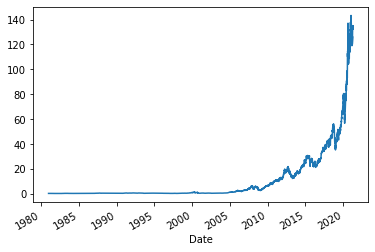

In [8]:
hist['Open'].plot()

### Earnings

In [10]:
apple_ticker.earnings

,Revenue,Earnings
Year,,
2017,229234000000,48351000000
2018,265595000000,59531000000
2019,260174000000,55256000000
2020,274515000000,57411000000


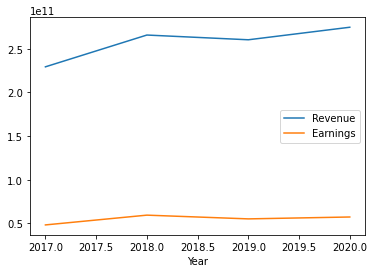

In [32]:
apple_ticker.earnings.plot()

## ISIN and Ticker

#### Ticker --> ISIN:

In [16]:
apple_ticker.isin

'US0378331005'

#### ISIN --> Ticker ???

In [27]:
def isin_request(isin):
    url = "https://query2.finance.yahoo.com/v1/finance/search"
    params = {'q': isin, 'quotesCount': 1, 'newsCount': 0}
    r = requests.get(url, params=params)
    data = r.json()
    if len(data['quotes']) != 0:
        symbol = data['quotes'][0]['symbol']
        ticker = yf.Ticker(symbol)
        if ticker is not None:
            output = {
                'symbol': symbol,
                'info': ticker.info
            }
    else:
        output = {
            'symbol': None,
            'info': {}
        }
    return output

In [28]:
query_response = isin_request('AU0000066086')

In [29]:
query_response

{'symbol': 'VUL.AX',
 'info': {'zip': '6000',
  'sector': 'Basic Materials',
  'longBusinessSummary': 'Vulcan Energy Resources Limited engages in the mineral exploration activities in Europe. It explores for lithium, copper, zinc, gold, silver, lead, magnetite, and sulfur deposits. The company holds interests in the Zero Carbon Lithium project; and LÃ¸kken, Grimsdal, Storwartz, Killingdal, and Tverrfjellet projects located in Norway. In addition, it holds interests in the Vulcan Lithium project situated in the Upper Rhine Valley of Germany. The company was formerly known as Koppar Resources Limited and changed its name to Vulcan Energy Resources Limited in September 2019. Vulcan Energy Resources Limited was incorporated in 2018 and is based in Perth, Australia.',
  'city': 'Perth',
  'phone': '61 8 6189 8767',
  'state': 'WA',
  'country': 'Australia',
  'companyOfficers': [],
  'website': 'http://www.v-er.com',
  'maxAge': 1,
  'address1': 'Brookfield Place',
  'industry': 'Other Indu

In [25]:
isin_info = query_response['info']

In [35]:
def isin_to_ticker_symbol(isin):
    data = isin_request(isin)
    if 'symbol' in data.keys():
        return data['symbol']
    else:
        return None

In [36]:
isin_to_ticker_symbol('AU0000066086')

'VUL.AX'

In [33]:
def isin_to_ticker(isin):
    symbol = isin_to_ticker_symbol(isin)
    if symbol is not None:
        return yf.Ticker(symbol)
    else:
        return None

In [38]:
ticker = isin_to_ticker('AU0000066086')

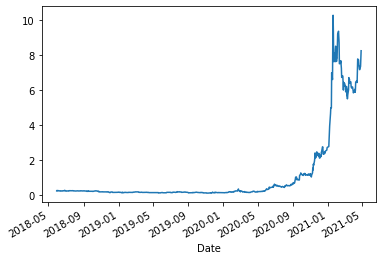

In [41]:
ticker.history(period='max')['Open'].plot()

## Handling n stocks

## Summary & final thoughts

- yfinance is convenient but relies too much on actual API
- Better use "https://query2.finance.yahoo.com/v1/finance/..." combined with requests for more flexibility
- Need a better feeling of how reliable information is and how accessible (e.g. Apple earnings)